In [1]:
import sys
sys.path.append('./../../3D_Gen/')
from Encoder.dataEmbedding.dataEmbedding import Read_Load_BuildBatch
from matplotlib.pylab import plt
from numpy import arange
import pandas as pd
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from Models.Generator import Generator32_Small

import torch
import trimesh
from trimesh import voxel
from functools import partial
import ssl
import os
import pickle

from config import cfg
import torch.optim as optim
import nrrd
import random
from Script.scripts import augment_voxel_tensor,sample_z,vizualizer_stanford_data,evaluateShape,vizualizer_stanford_data,loadOneElem,evalTestSet,generateModelImages
#import point_cloud_utils as pcu
import matplotlib

Trening

In [24]:
with open(os.path.join(getattr(cfg,"GAN_INFO_DATA"),'GAN_data11_12.pkl'), 'rb') as pickle_file:
    tmp0=pickle.load(pickle_file)

In [30]:
with open(os.path.join(getattr(cfg,"GAN_INFO_DATA"),'GAN_data.pkl'), 'wb') as pickle_file:
    pickle.dump(infoData,pickle_file)

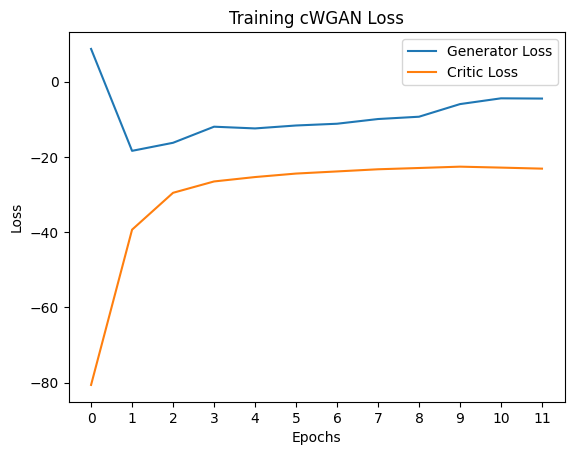

In [38]:
from matplotlib.pylab import plt
from numpy import arange


epochs = range(0, len(infoData['train_gen_loss']))
 
plt.plot(range(0,len(infoData['train_gen_loss'])), infoData['train_gen_loss'], label='Generator Loss')
plt.plot(range(0,len(infoData['train_gen_loss'])), infoData['train_crit_loss'], label='Critic Loss')
 
# Add in a title and axes labels
plt.title('Training cWGAN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, len(infoData['train_gen_loss']), 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()

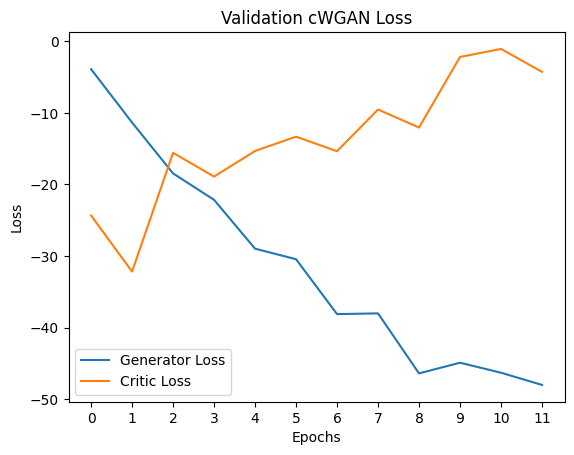

In [39]:
epochs = range(0, len(infoData['train_gen_loss']))
 
plt.plot(range(0,len(infoData['val_gen_loss'])), infoData['val_gen_loss'], label='Generator Loss')
plt.plot(range(0,len(infoData['val_crit_loss'])), infoData['val_crit_loss'], label='Critic Loss')
 
# Add in a title and axes labels
plt.title('Validation cWGAN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, len(infoData['train_gen_loss']), 1))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [2]:
with open('./../InfoData/GANexp.pkl', 'rb') as pickle_file:
    metrics=pickle.load(pickle_file)

In [10]:
table=[]
chair=[]

for idx,i in enumerate(metrics['label']):
    if i==0:
        chair.append((idx,metrics['chamfer_distance'][idx]))
    else:
        table.append((idx,metrics['chamfer_distance'][idx]))
        

In [ ]:
# Unpack x and y coordinates for each class
class1_x, class1_y = zip(*chair)
class2_x, class2_y = zip(*table)

point_size=1
plt.figure(figsize=(10, 10))
# Plot points for each class
plt.scatter(class1_x, class1_y, label='Chair', color='blue',s=point_size)
plt.scatter(class2_x, class2_y, label='Table', color='red',s=point_size)


#x_values = np.linspace(0,2.5, 100)
# Plot the function f(x) = x
#plt.plot(x_values, x_values, label='f(x) = x', color='green', linestyle='-')


# Add labels and title
plt.ylabel('Odległość pomiędzy wzorcem, a wygenrowanym kształtem')
plt.xlabel('Model Id')
plt.title('Odległość Chamfera')
#plt.xlim(0, 2.5)
#plt.ylim(0, 2.5)
#ax = plt.gca()
#ax.set_aspect('equal', adjustable='box')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Testy

In [6]:
with open(getattr(cfg,"GAN_TEST_SPLIT"), 'rb') as pickle_file:
    tmp=pickle.load(pickle_file)

In [2]:


generator=Generator32_Small()
generator.load_state_dict(torch.load(os.path.join('./../SavedModels',"generator_model.pth"),map_location=torch.device('cpu')))
generator=generator.to(cfg.DEVICE)
generator.eval()

Generator32_Small(
  (fc1): Sequential(
    (0): Linear(in_features=160, out_features=8192, bias=True)
    (1): BatchNorm1d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): ConvTranspose3d(128, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
    (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): ConvTranspose3d(128, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): ConvTranspose3d(64, 1, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1))
  )
)

Vizualization

In [ ]:
idx=random.randint(0,len(tmp))
k=loadOneElem(idx,tmp)
p=generator(k[1])
p=p['sigmoid_output'].squeeze(0).detach()
vizualizer_stanford_data(p.cpu(),'fake')

In [ ]:
vizualizer_stanford_data(k[2],'true')